<h1><center> Linear Algebra 2

### Tensor Transpose

- Transpose of scalar is itself , e.g: $x^T = x$
- Transpose pf vector, seen earlier, converts column to row _(vice versa)_
- Scalar and vector transposition are special cases of **Matrix Transposition**
    - Flip of axes over the main diagonal such that:
    
### $$ \boldsymbol{X^T_{i,j}= X_{j,i}}$$
    
## $$ {\begin {bmatrix}x_{1,1} & x_{1,2}\\x_{2,1} & x_{1,2}\\x_{3,1} & x_{1,2} \end{bmatrix}}^T =  \begin {bmatrix}x_{1,1} & x_{2,1} & x_{3,1}\\x_{1,2} & x_{2,2} & x_{3,2} \end{bmatrix}$$

In [3]:
import torch
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [8]:
# Torch

X_pt= torch.tensor([
    [25,2],
    [5,26],
    [3,7]
])
X_pt

tensor([[25,  2],
        [ 5, 26],
        [ 3,  7]])

In [12]:
# Torch Transpose
X_pt.T

tensor([[25,  5,  3],
        [ 2, 26,  7]])

In [9]:
# Tensorflow

X_tf = tf.Variable([
    [25,2],
    [5,26],
    [3,7]
])

X_tf

<tf.Variable 'Variable:0' shape=(3, 2) dtype=int32, numpy=
array([[25,  2],
       [ 5, 26],
       [ 3,  7]])>

In [13]:
# Tensorflow Transpose
tf.transpose(X_tf)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[25,  5,  3],
       [ 2, 26,  7]])>

#### Basic Tensor Arithmetic

In [23]:
# Torch Arithematic

print(f'{X_pt} \n\n {X_pt+2} \n\n {X_pt*2 +2}')

tensor([[25,  2],
        [ 5, 26],
        [ 3,  7]]) 

 tensor([[27,  4],
        [ 7, 28],
        [ 5,  9]]) 

 tensor([[52,  6],
        [12, 54],
        [ 8, 16]])


In [24]:
# Tensorflow Arithematic

print(f'{X_tf} \n\n {X_tf+2} \n\n {X_tf*2 +2}')

<tf.Variable 'Variable:0' shape=(3, 2) dtype=int32, numpy=
array([[25,  2],
       [ 5, 26],
       [ 3,  7]])> 

 [[27  4]
 [ 7 28]
 [ 5  9]] 

 [[52  6]
 [12 54]
 [ 8 16]]


### Hadamard Product

If two tensors have same size, operations are often by default elementr - wise. this is called as **Hadamard product**. The mathematical notation is:-
### $$A\odot B$$

In [25]:
# Torch Hadamrd Product

A_pt = X_pt + 2
A_pt * X_pt

tensor([[675,   8],
        [ 35, 728],
        [ 15,  63]])

In [26]:
# Tensorflow Hadamard Product

A_tf = X_tf + 2
A_tf * X_tf

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[675,   8],
       [ 35, 728],
       [ 15,  63]])>

### Tensor Reduction

Calculating sum across all elements of a tensor is a c common operatin For e.g:
    - For vector $\boldsymbol x$ length $n$, we calculate
   ### $$\sum_{i=1}^{m}{x_i}$$
    - For matrix $\boldsymbol X$ with a $m$ by $n$ diimesnions, we calculate 
   ## $$\sum_{i=1}^m \sum_{j=1}^n {X_{i,j}}$$

In [28]:
X_pt

tensor([[25,  2],
        [ 5, 26],
        [ 3,  7]])

In [29]:
# Reduction

25 + 2+ 5 + 26 + 3 + 7

68

In [40]:
# Torch Reduction

X_pt.sum()
# OR
print(f'{torch.sum(X_pt)}\n\nRow Sum: {X_pt.sum(axis=0)}\n\nColumn Sum:{X_pt.sum(axis=1)}')

68

Row Sum: tensor([33, 35])

Column Sum:tensor([27, 31, 10])


In [41]:
# TensorFlow Reduction

tf.reduce_sum(X_tf)
print(f'{tf.reduce_sum(X_tf)}\n\nRow Sum: {tf.reduce_sum(X_tf, axis =0)}\n\nColumn Sum:{tf.reduce_sum(X_tf,axis=1)} ')

68

Row Sum: [33 35]

Column Sum:[27 31 10] 


#### Types of  other Reduction Operations:
- Maximun
- Minimum
- Mean
- Product

In [42]:
torch.max(X_pt), tf.reduce_max(X_tf), torch.min(X_pt), tf.reduce_min(X_tf)

(tensor(26),
 <tf.Tensor: shape=(), dtype=int32, numpy=26>,
 tensor(2),
 <tf.Tensor: shape=(), dtype=int32, numpy=2>)

In [50]:
torch.mean(X_pt, dtype = torch.float), tf.reduce_mean(X_tf), torch.prod(X_pt), tf.reduce_prod(X_tf)

(tensor(11.3333),
 <tf.Tensor: shape=(), dtype=int32, numpy=11>,
 tensor(136500),
 <tf.Tensor: shape=(), dtype=int32, numpy=136500>)

### Dot Product

If we have two vectors say $x$ and $y$# with same length $n$, we can aclculate the dot product between them. In following way:

## $$x.y$$

We calculate products in an element wise fashion and then sum reductively across the products tyo scalar value:
**Hadamard Product + Reduction Sum**:
## $$\sum_{i=1}^n{x_iy_i}$$

The dot product is **ubiquitous** in machine learning

$*$ Happens with Vecors only, Also called as Scalar Product


In [58]:
# Torch Dot

x_pt = torch.tensor([25,2,5])
y_pt = torch.tensor([0,1,2])

torch.dot(x_pt,y_pt)

tensor(12)

In [67]:
# TensorFlow Dot Prduct

x_tf = tf.Variable([25,2,5])
y_tf = tf.Variable([0,1,2])

tf.tensordot(x_tf,y_tf,axes=1)
# OR
tf.reduce_sum(tf.multiply(x_tf,y_tf))

<tf.Tensor: shape=(), dtype=int32, numpy=12>

In [68]:
# Dot Product

25*0 + 2*1 + 5*2

12

### Solving linear systems

#### Substitution:


Substitution method in equation is:
$$y=3x$$
$$-5x +2y =2$$
The second equation can be arranged to isolate y:
### $$2y = 2 + 5x$$
### $$y = \frac{2+5x}{2} = 1+ \frac{5x}{2}$$

In [81]:
x = np.linspace(-10,10,1000)

y1 = 3*x
y2 = 1 + 5*x/2 

Text(0, 0.5, 'y')

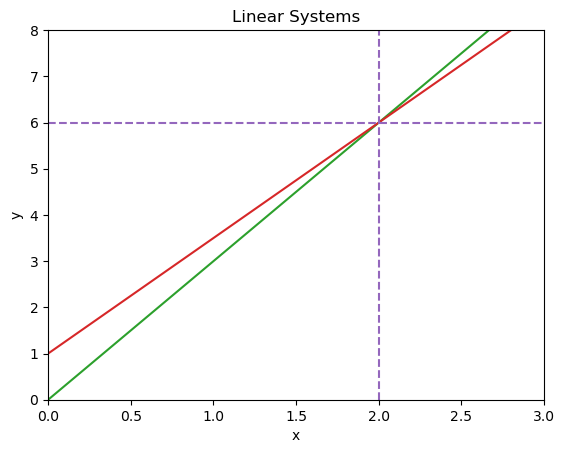

In [71]:
fig,ax = plt.subplots()

ax.set_xlim([0,3])
ax.set_ylim([0,8])
ax.plot(x,y1, c="tab:green")
ax.plot(x,y2, c="tab:red")

plt.axhline(y = 6, color="tab:purple", linestyle="--")
plt.axvline(x = 2, color="tab:purple", linestyle="--")

plt.title("Linear Systems: Subsitution")
plt.xlabel("x")
plt.ylabel("y")

#### Elimination

Elimination method equation is:
$$2x-3y = 15$$
$$4x+10y = 14$$

Both equation can be arranged to isolate y:
$$-3y=15-2x$$
$$y= -5 + \frac{2x}{3}$$

Second equation is:

$$y = \frac{14-4x}{10} = \frac{7-2x}{5}$$

In [75]:
x = np.linspace(-10,10,1000)

y1 = -5 + 2*x/3
y2 = (7-2*x)/5

Text(0.5, 1.0, 'Linear Systems: Elimination')

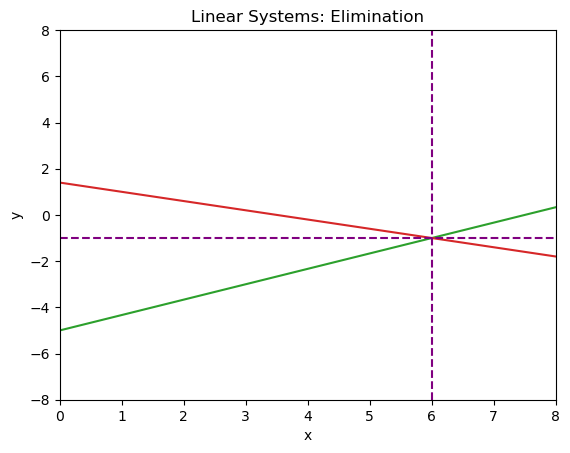

In [78]:
fig,ax = plt.subplots()
ax.set_xlim([0,8])
ax.set_ylim([-8,8])
ax.plot(x,y1,c="tab:green")
ax.plot(x,y2,c="tab:red")

ax.axvline(x=6,color="purple", linestyle="--")
ax.axhline(y=-1,color="purple",linestyle="--")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Systems: Elimination")